# Iris Dataset

In [1]:
import numpy as np # numpy for calculation
import pandas as pd # pandas for data processing and open csv file
import seaborn as sns # seaborn for visualization
import matplotlib.pyplot as plt # matplotlib for visualization

In [4]:
iris = pd.read_csv("./data/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.shape

(150, 6)

In [6]:
iris.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

There are not missing value in this data.

In [10]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

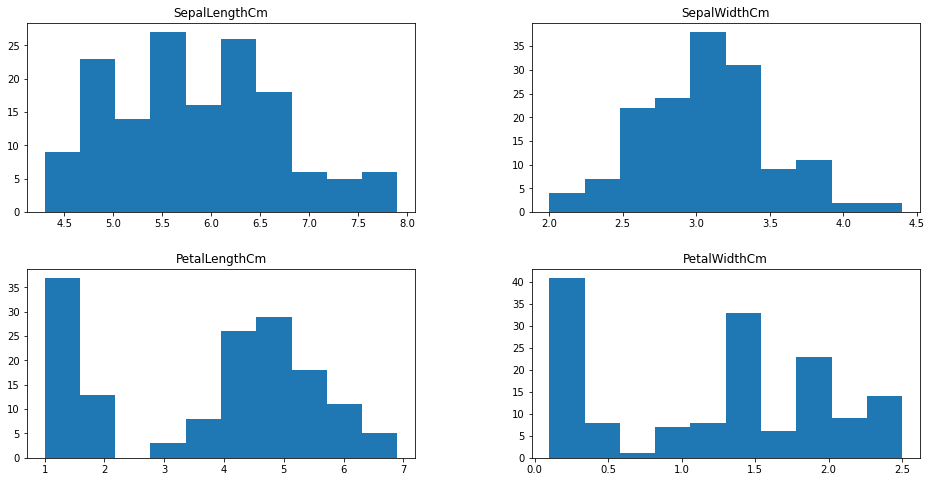

In [31]:
iris.drop("Id", axis=1).hist(figsize=(16,8), grid=0)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

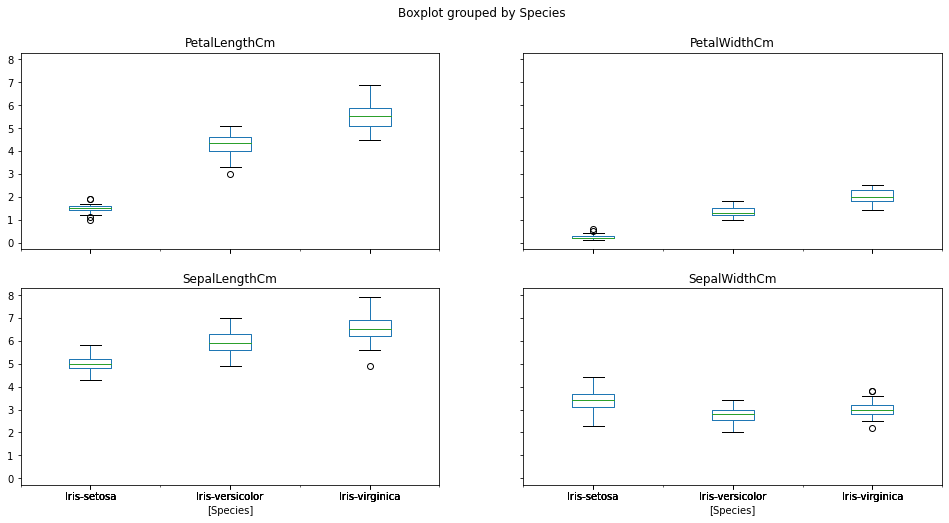

In [32]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(16, 8), grid=0)

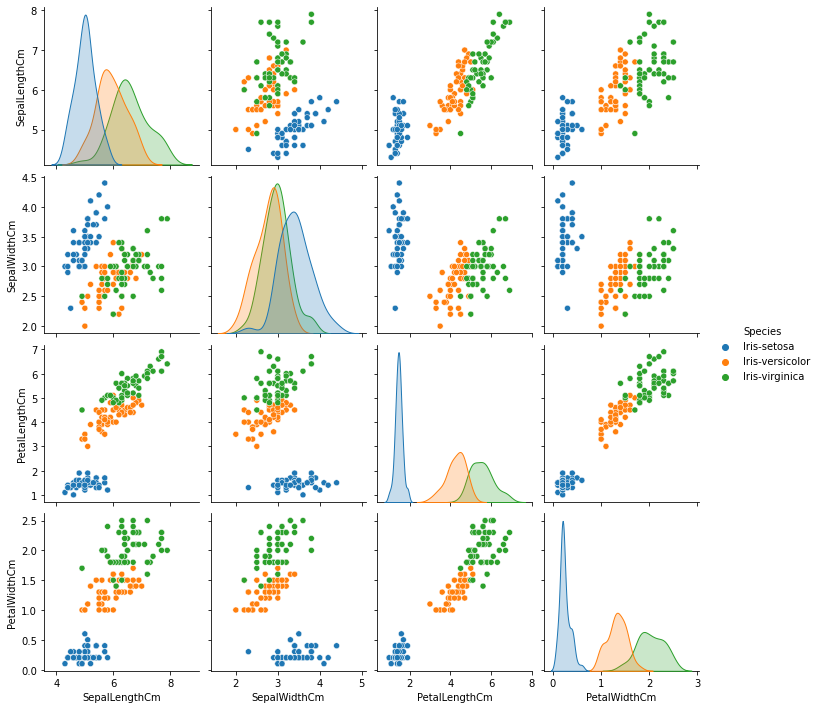

In [44]:
sns.pairplot(iris.drop("Id", axis=1), hue='Species', kind='scatter')

<AxesSubplot:>

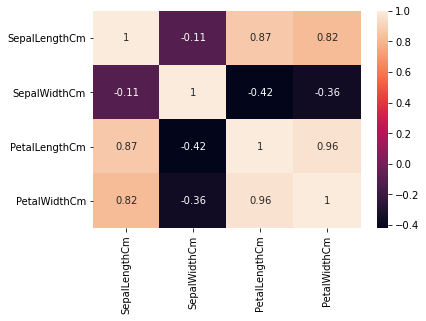

In [48]:
sns.heatmap(iris.drop("Id", axis=1).corr(), annot= True)

<AxesSubplot:>

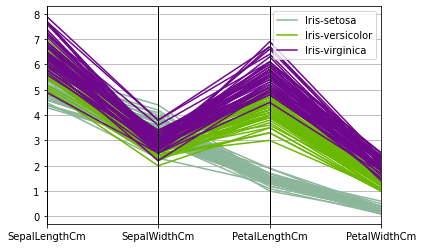

In [49]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics 


train, test=train_test_split(iris, test_size=0.3, stratify= iris["Species"], random_state=42)
X_train=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train=train.Species
X_test=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test=test.Species

In [56]:
mod_dt=DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)

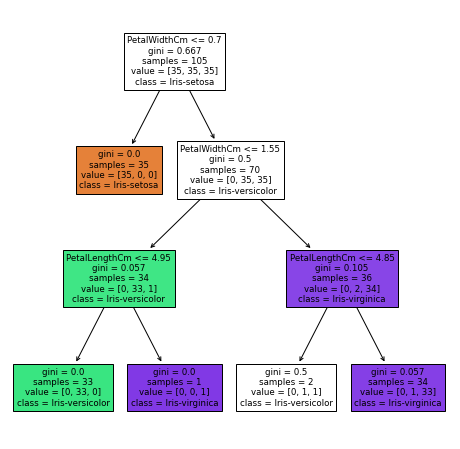

In [59]:
plt.figure(figsize=(8,8))
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa','Iris-versicolor','Iris-virginica']
plot_tree(mod_dt, feature_names=fn, class_names=cn, filled=True);